In [312]:
import os, sys, glob, traceback
import numpy as np
import scipy.signal as sigpro
import scipy.linalg as scpla

from tqdm.notebook import tqdm
import math
import string

import heapq
from collections import defaultdict
import itertools
from functools import lru_cache



%matplotlib notebook
import matplotlib.pyplot as plt

In [159]:
def dprint(lvl, *args, **kwargs):
    if dbg>=lvl:
        print(*args, **kwargs)

In [22]:
### Problem 1

txtin = ['1000',
    '2000',
    '3000',
    '',
    '4000',
    '',
    '5000',
    '6000',
    '',
    '7000',
    '8000',
    '9000',
    '',
    '10000']

with open('p01_input.txt', 'r') as fid:
    ptvals = fid.readlines()
#print(ptvals)

def ptext(txtin):
    txtvals = [{'tot':0, 'vals':[]}]
    for ln in txtin:
        if '\n' in ln:
            ln = ln.replace('\n', '')
        if ln == '':
            txtvals.append({'tot':0, 'vals':[]})
        else:
            v = int(ln)
            txtvals[-1]['tot'] += v
            txtvals[-1]['vals'].append(v)
    vv = np.array([v['tot'] for v in txtvals])
    vs = np.sort(vv)
    vi = np.argsort(vv)
    print('Max {} for elf {}, top 3 elves have {}'.format(vs[-1], 1+vi[-1], np.sum(vs[-3:])))
    
    return txtvals

vo = ptext(txtin)
vo = ptext(ptvals)


Max 24000 for elf 4, top 3 elves have 45000
Max 74198 for elf 209, top 3 elves have 209914


In [28]:
### Problem 2

txtin = ['A Y',
            'B X',
            'C Z']

with open('p02_input.txt', 'r') as fid:
    ptvals = fid.readlines()
    
def p2scoreit(txvals):
    scr = {'rock': 1, 'paper':2, 'scissors':3}
    emap = {'A':'rock', 'B':'paper', 'C':'scissors'}
    mmap = {'X':'rock', 'Y':'paper', 'Z':'scissors'}
    
    wins = ['rs','pr','sp']
    
    wscr = [0, 3, 6]
    totscr = 0
    for ln in txvals:
        ln = ln.replace('\n','')
        thisround = mmap[ln[-1]][0]+emap[ln[0]][0]
        thisscore = scr[mmap[ln[-1]]]
        if thisround in wins:
            thisscore += 6
        elif thisround[0] == thisround[-1]:
            thisscore += 3
        #print(thisround, thisscore)
        totscr += thisscore
    return totscr

def p2bscoreit(txvals):
    scr = {'r': 1, 'p':2, 's':3}
    emap = {'A':'r', 'B':'p', 'C':'s'}
    mmap = {'X':'lose', 'Y':'draw', 'Z':'win'}
    
    wins = ['rs','pr','sp']
    
    plays = {'win':{'r':'p', 'p':'s', 's':'r'},
             'draw':{'r':'r', 'p':'p', 's':'s'},
             'lose':{'r':'s', 'p':'r', 's':'p'}}
    
    wscr = [0, 3, 6]
    totscr = 0
    for ln in txvals:
        ln = ln.replace('\n','')
        thisround = plays[mmap[ln[-1]]][emap[ln[0]]] + emap[ln[0]]
        thisscore = scr[thisround[0]]
        if thisround in wins:
            thisscore += 6
        elif thisround[0] == thisround[-1]:
            thisscore += 3
        #print(thisround, thisscore)
        totscr += thisscore
    return totscr

print(p2scoreit(ptvals))
print(p2bscoreit(ptvals))
        


11603
12725


In [32]:
### Problem 3

import string


txtin = ['vJrwpWtwJgWrhcsFMMfFFhFp',
        'jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL',
        'PmmdzqPrVvPwwTWBwg',
        'wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn',
        'ttgJtRGJQctTZtZT',
        'CrZsJsPPZsGzwwsLwLmpwMDw']

with open('p03_input.txt', 'r') as fid:
    ptvals = fid.readlines()
def get_pri(textin):
    pri = {}
    p = 0
    for char in string.ascii_lowercase:
        p+=1
        pri[char] = p
    for char in string.ascii_uppercase:
        p+=1
        pri[char] = p
    pscore=0
    for ln in textin:
        ln = ln.replace('\n', '')
        N = len(ln)
        for ii in range(N//2):
            if ln[ii] in ln[N//2:]:
                pscore += pri[ln[ii]]
                break
    print('Score = {}'.format(pscore))
    
def get_badge_pri(textin):
    pri = {}
    p = 0
    for char in string.ascii_lowercase:
        p+=1
        pri[char] = p
    for char in string.ascii_uppercase:
        p+=1
        pri[char] = p
    pscore=0
    for lnx in range(len(textin)//3):
        ln = textin[3*lnx].replace('\n', '')
        N = len(ln)
        for ii in range(N):
            if ln[ii] in textin[3*lnx+1] and ln[ii] in textin[3*lnx+2]:
                pscore += pri[ln[ii]]
                break
    print('Score = {}'.format(pscore))
get_pri(txtin)
get_pri(ptvals)

get_badge_pri(txtin)
get_badge_pri(ptvals)

Score = 157
Score = 7428
Score = 70
Score = 2650


In [39]:



txtin = ['2-4,6-8',
        '2-3,4-5',
        '5-7,7-9',
        '2-8,3-7',
        '6-6,4-6',
        '2-6,4-8']

with open('p04_input.txt', 'r') as fid:
    ptvals = fid.readlines()
    
def count_overlap_pairs(textvals):
    ctp = 0
    ctq = 0
    
    for ln in textvals:
        ln = ln.replace('\n', '')
        
        lnsplt = ln.split(',')
        lna = lnsplt[0].split('-')
        #print(lna)
        lnb = lnsplt[1].split('-')
        #print(lnb)
        r1 = [int(lna[0]), int(lna[1])]
        r2 = [int(lnb[0]), int(lnb[1])]
        
        if (r1[0]>=r2[0] and r1[1]<=r2[1]) or (r2[0]>=r1[0] and r2[1]<=r1[1]):
            ctp += 1
            
        if (r1[0]>=r2[0] and r1[0]<=r2[1]) or (r2[0]>=r1[0] and r2[0]<=r1[1]):
            ctq += 1
    print('{} full overlapping pairs'.format(ctp))
    
    print('{} partial overlapping pairs'.format(ctq))
count_overlap_pairs(txtin)
count_overlap_pairs(ptvals)
        



2 full overlapping pairs
4 partial overlapping pairs
500 full overlapping pairs
815 partial overlapping pairs


In [160]:
txtin = ['    [D]    ',
         '[N] [C]    ',
         '[Z] [M] [P]',
         ' 1   2   3 ',
         '',
         'move 1 from 2 to 1',
         'move 3 from 1 to 3',
         'move 2 from 2 to 1',
         'move 1 from 1 to 2']

with open('p05_input.txt', 'r') as fid:
    ptvals = fid.readlines()

dbg = 0

def restack(textin):
    #read the current stacks
    
    stacks = True
    cstk = []
    for ln in textin:
        ln = ln.replace('\n', '')
        dprint(1,ln)
        if len(ln) == 0:
            stacks = False
            dprint(1,cstk)
            continue
        if stacks:
            if len(cstk) == 0:
                numstacks = (1+len(ln))//4
                for ii in range(numstacks):
                    cstk.append('')
            for ii in range(numstacks):
                iu = 4*ii+1
                if ln[iu] == '1':
                    break
                if ln[iu] != ' ':
                    cstk[ii] = cstk[ii]+ln[iu]
        else:
            #dprint(c1,stk)
            num2move = int(ln.split(' ')[1])
            mvfrom = int(ln.split(' ')[3])
            mvto = int(ln.split(' ')[5])
            for ii in range(num2move):
                cstk[mvto-1] = cstk[mvfrom-1][0] + cstk[mvto-1]
                cstk[mvfrom-1] = cstk[mvfrom-1][1:]
            dprint(1,cstk)
            dprint(1,'=='*30)
    for stk in cstk:
        print(stk[0], end='')
    print()
def restack9001(textin):
    #read the current stacks
    
    stacks = True
    cstk = []
    for ln in textin:
        ln = ln.replace('\n', '')
        dprint(1,ln)
        if len(ln) == 0:
            stacks = False
            dprint(1,cstk)
            continue
        if stacks:
            if len(cstk) == 0:
                numstacks = (1+len(ln))//4
                for ii in range(numstacks):
                    cstk.append('')
            for ii in range(numstacks):
                iu = 4*ii+1
                if ln[iu] == '1':
                    break
                if ln[iu] != ' ':
                    cstk[ii] = cstk[ii]+ln[iu]
        else:
            #print(cstk)
            num2move = int(ln.split(' ')[1])
            mvfrom = int(ln.split(' ')[3])
            mvto = int(ln.split(' ')[5])
            
            cstk[mvto-1] = cstk[mvfrom-1][:num2move] + cstk[mvto-1]
            cstk[mvfrom-1] = cstk[mvfrom-1][num2move:]
            dprint(1,cstk)
            dprint(1,'=='*30)
    for stk in cstk:
        print(stk[0], end='')
    print()            
    
restack(txtin)
restack(ptvals)

restack9001(txtin)
restack9001(ptvals)

    
    

CMZ
QMBMJDFTD
MCD
NBTVTJNFJ


In [161]:
txtin = ['mjqjpqmgbljsphdztnvjfqwrcgsmlb',# seven
         'bvwbjplbgvbhsrlpgdmjqwftvncz',#: first marker after character 5
         'nppdvjthqldpwncqszvftbrmjlhg', #: first marker after character 6
         'nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg', #: first marker after character 10
         'zcfzfwzzqfrljwzlrfnpqdbhtmscgvjw'] #: first marker after character 11',

with open('p06_input.txt', 'r') as fid:
    ptvals = fid.readlines()
#print(ptvals)
def find_marker(textin):
    txu = textin.replace('\n','')
    tused = ''
    gct = 0
    for itx, t in enumerate(txu):
        if itx>=3:
            tused = t
            for tt in txu[itx-1:itx-4:-1]:
                if not tt in tused:
                    tused = tused+tt
            if len(tused) == 4:
                #print(txu[:itx+1])
                #print('{} + {}'.format(txu[itx-3:itx], t))
                print('Marker at {}'.format(itx+1))
                break
def find_fmarker(textin):
    txu = textin.replace('\n','')
    tused = ''
    gct = 0
    for itx, t in enumerate(txu):
        if itx>=13:
            tused = t
            for tt in txu[itx-1:itx-14:-1]:
                if not tt in tused:
                    tused = tused+tt
            if len(tused) == 14:
                #print(txu[:itx+1])
                #print('{} + {}'.format(txu[itx-3:itx], t))
                print('Marker at {}'.format(itx+1))
                break
dbg = 100
for tcheck in txtin:
    find_marker(tcheck)

find_marker(ptvals[0])

find_fmarker(ptvals[0])

Marker at 7
Marker at 5
Marker at 6
Marker at 10
Marker at 11
Marker at 1625
Marker at 2250


In [121]:
txtin = ['$ cd /',
        '$ ls',
        'dir a',
        '14848514 b.txt',
        '8504156 c.dat',
        'dir d',
        '$ cd a',
        '$ ls',
        'dir e',
        '29116 f',
        '2557 g',
        '62596 h.lst',
        '$ cd e',
        '$ ls',
        '584 i',
        '$ cd ..',
        '$ cd ..',
        '$ cd d',
        '$ ls',
        '4060174 j',
        '8033020 d.log',
        '5626152 d.ext',
        '7214296 k']

with open('p07_input.txt', 'r') as fid:
    ptvals = fid.readlines()

def get_dir_info(textin):
    ds = {}
    cwd = None
    mxlvl = 0
    
    for ln in textin:
        ln = ln.replace('\n','')
        if ln.startswith('$ '):
            # print(ln)
            lncmd = ln.split(' ')
            if lncmd[1] == 'cd':
                if lncmd[-1] == '..':
                    owd = cwd
                    cwd = ds[cwd]['parent']
                    ds[cwd]['size'] += ds[owd]['size']
                    lvl -= 1
                elif lncmd[-1] == '/':
                    cwd = lncmd[-1]
                    ds[cwd] = {'parent':None, 'level':0, 'size':0, 'files':[], 'children':[]}
                    lvl = 0
                else:
                    lvl += 1
                    owd = cwd
                    if owd is None:
                        cwd = lncmd[-1]
                    else:
                        cwd = owd+'-'+lncmd[-1]
                    if cwd in ds.keys():
                        print('We seem to be revisiting')
                    else:
                        ds[cwd] = {'parent':owd, 'level':ds[owd]['level']+1, 'size':0, 'files':[], 'children':[]}
                        if ds[cwd]['level'] > mxlvl:
                            mxlvl = ds[cwd]['level']
            else:
                ajnk = 0
                #print('Doing an ls {} in {}'.format(lncmd[-1], cwd))
        else:
            lninfo = ln.split(' ')
            if lninfo[0].startswith('dir'):
                ds[cwd]['children'].append(lninfo[-1])
            else:
                sz = int(lninfo[0])
                ds[cwd]['files'].append({'size':sz, 'name':lninfo[-1]})
                ds[cwd]['size'] += sz
    while lvl > 0:
        owd = cwd
        cwd = ds[cwd]['parent']
        ds[cwd]['size'] += ds[owd]['size']
        lvl -= 1
        
    
    
    allsize = 0    
    for ky in ds.keys():
        if ds[ky]['size'] < 100000:
            allsize += ds[ky]['size']
    print('{} total in directories less the 100K'.format(allsize))
    # print(ds)  
    # find the best directory to delete
    
    totsize = ds['/']['size']
    ktarget = totsize - (70000000-30000000)
    
    ktc = 5000*ktarget
    print(totsize,ktarget, ktc)
    
    for ky in ds.keys():
        if ds[ky]['size'] >= ktarget:
            
            if ds[ky]['size'] < ktc:
                ktc = ds[ky]['size']
    print('Need to delete: {}'.format(ktc))
            
            
        
        
        
get_dir_info(txtin)
print(txtin)    
#print(ptvals)
print('- '*30)
get_dir_info(ptvals)

95437 total in directories less the 100K
48381165 8381165 41905825000
Need to delete: 24933642
['$ cd /', '$ ls', 'dir a', '14848514 b.txt', '8504156 c.dat', 'dir d', '$ cd a', '$ ls', 'dir e', '29116 f', '2557 g', '62596 h.lst', '$ cd e', '$ ls', '584 i', '$ cd ..', '$ cd ..', '$ cd d', '$ ls', '4060174 j', '8033020 d.log', '5626152 d.ext', '7214296 k']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
1555642 total in directories less the 100K
45349983 5349983 26749915000
Need to delete: 5974547


In [163]:
txtin = ['30373',
         '25512',
         '65332',
         '33549',
         '35390']

with open('p08_input.txt', 'r') as fid:
    ptvals = fid.readlines()
    
def vmap(textin):
    nrows = len(textin)
    ln0 = textin[0].replace('\n','')
    ncols = len(ln0)
    themap = np.zeros((nrows, ncols), dtype = 'int')
    #convert the text to a grid
    for lnx, ln in enumerate(textin):
        ln = ln.replace('\n', '')
        for ic, ltr in enumerate(ln):
            themap[lnx, ic] = int(ltr, base=10)
            
    vmap = np.zeros((nrows, ncols), dtype = 'int')
    for ir in range(nrows):
        for ic in range(ncols):
            if ir == 0 or ir == nrows-1 or ic == 0 or ic == ncols-1:
                vmap[ir, ic] = 1
            elif all(themap[ir, ic] > themap[:ir, ic]):
                vmap[ir, ic] = 1
            elif all(themap[ir, ic] > themap[ir, :ic]):
                vmap[ir, ic] = 1
            elif all(themap[ir, ic] > themap[ir+1:, ic]):
                vmap[ir, ic] = 1
            elif all(themap[ir, ic] > themap[ir, ic+1:]):
                vmap[ir, ic] = 1
            
    print('Total visible {}'.format(np.sum(vmap)))
    vmap2 = np.zeros((nrows, ncols), dtype = 'int')
    for ir in range(nrows):
        for ic in range(ncols):
            visleft = 0
            visright = 0
            visup = 0
            visdown = 0
            for ii in range(ic-1, -1, -1):
                visleft += 1
                if themap[ir, ii] >= themap[ir,ic]:
                    break
            for ii in range(ic+1, ncols):
                visright += 1
                if themap[ir, ii] >= themap[ir,ic]:
                    break
            for ii in range(ir-1, -1, -1):
                visup += 1
                if themap[ii, ic] >= themap[ir,ic]:
                    break
            for ii in range(ir+1, nrows):
                visdown += 1
                if themap[ii, ic] >= themap[ir,ic]:
                    break
            
            #print('{},{}, left {}, right {}, up {}, down {}, prod={}'.format(ir, ic, visleft, visright, visup, visdown,
            #                                                       visleft*visright*visup*visdown))
            vmap2[ir,ic] = visleft * visright * visup * visdown
    print('Best tree viewing site has {} trees visible'.format(vmap2.max()))
    
                
    
            
    #_=plt.figure()
    #_=plt.imshow(vmap)

vmap(txtin)

vmap(ptvals)


Total visible 21
Best tree viewing site has 8 trees visible
Total visible 1538
Best tree viewing site has 496125 trees visible


In [168]:
txtin = ['R 4',
        'U 4',
        'L 3',
        'D 1',
        'R 4',
        'D 1',
        'L 5',
        'R 2']

with open('p09_input.txt', 'r') as fid:
    ptvals = fid.readlines()

dbg = 1
def ropesim(textin, numknots=2):
    headgrid = np.zeros((2000, 2000), dtype = 'int')
    tailgrid = np.zeros((2000, 2000), dtype = 'int')
    hpos = np.zeros((numknots, 2), dtype='int')
    headgrid[hpos[0,0], hpos[0,1]] += 1
    tailgrid[hpos[-1, 0], hpos[-1, 1]] += 1
    hsteps = {'U':np.array([1,0]),
              'D':np.array([-1,0]),
              'R':np.array([0,1]),
              'L':np.array([0,-1])}
    
    for ln in textin:
        ln = ln.replace('\n', '')
        dvs = ln.split(' ')
        for ii in range(int(dvs[1])):
            hpos[0,:] += hsteps[dvs[0]]
            for ik in range(1, numknots):
                htdiff = hpos[ik-1,:] - hpos[ik,:]
                hta = np.abs(htdiff)
                hta[hta==0]=1
                if any(hta>1):
                    hpos[ik,:] += htdiff//hta
                
            
            headgrid[hpos[0,0], hpos[0,1]] += 1
            tailgrid[hpos[-1, 0], hpos[-1, 1]] += 1
            #headgrid[hpos[0], hpos[1]] += 1
            #tailgrid[tpos[0], tpos[1]] += 1
    #_=plt.figure()
    #_=plt.imshow(headgrid)
    #_=plt.figure()
    #_=plt.imshow(tailgrid)
    
    dprint(1, 'Number of grid elements the tail gets into {}'.format(np.sum(tailgrid>0)))
ropesim(txtin)

ropesim(ptvals)

txty2 = ['R 5', 'U 8', 'L 8', 'D 3', 'R 17', 'D 10', 'L 25', 'U 20']

ropesim(txty2, numknots=10)
ropesim(ptvals, numknots=10)

ropesim(ptvals, numknots=100)


Number of grid elements the tail gets into 13
Number of grid elements the tail gets into 6212
Number of grid elements the tail gets into 36
Number of grid elements the tail gets into 2522
Number of grid elements the tail gets into 333


The sum is 13140print(x)
[[1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0
  1 1 0 0]
 [1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0
  1 1 1 0]
 [1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1
  0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0
  0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0
  1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0
  0 0 0 0]]


<IPython.core.display.Javascript object>


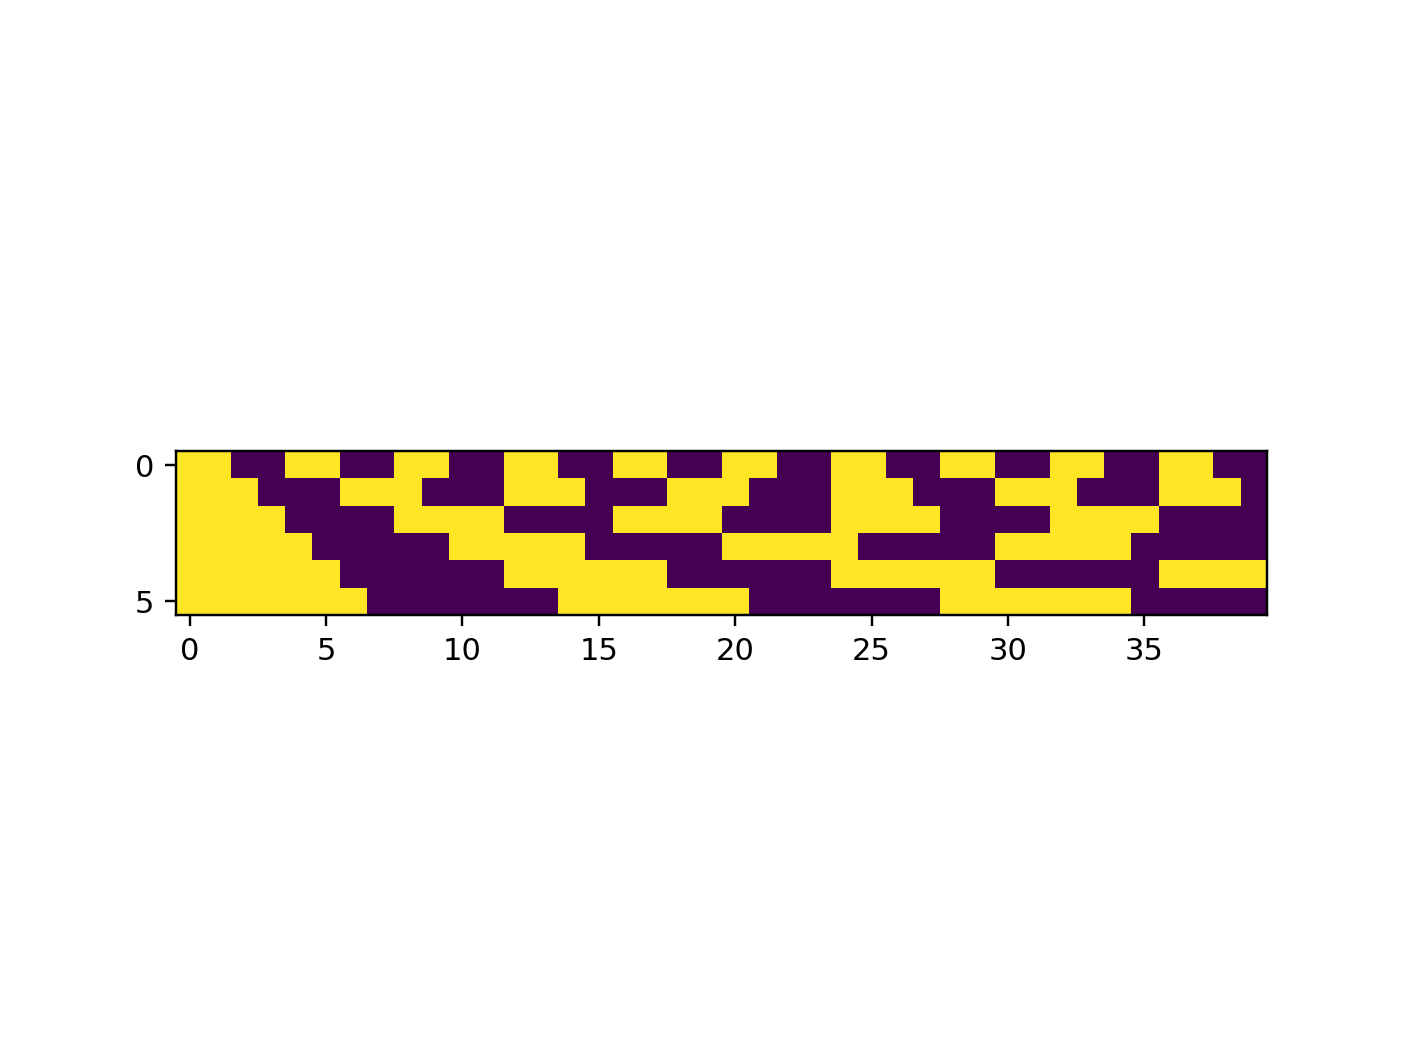

The sum is 14320print(x)
[[1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0
  0 1 1 0]
 [1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0
  0 0 1 0]
 [1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0
  0 0 1 0]
 [1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0
  0 0 1 0]
 [1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
  0 0 1 0]
 [1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
  1 1 0 0]]


<IPython.core.display.Javascript object>


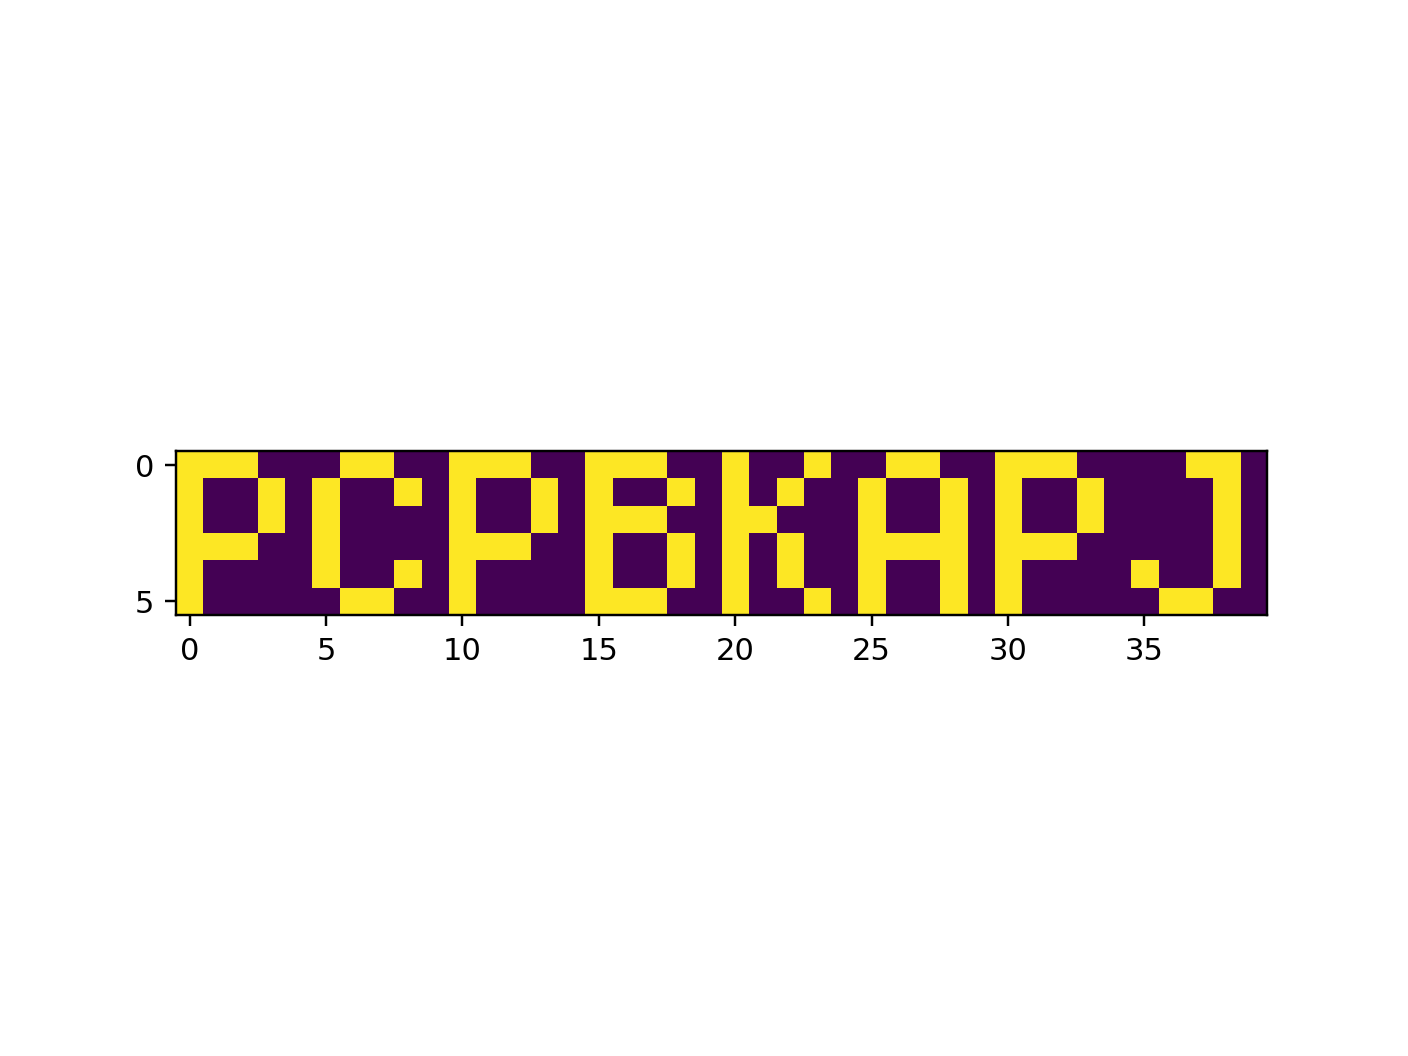

In [207]:
txtin = '''noop
addx 3
addx -5'''

txt2 ='''addx 15
addx -11
addx 6
addx -3
addx 5
addx -1
addx -8
addx 13
addx 4
noop
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx -35
addx 1
addx 24
addx -19
addx 1
addx 16
addx -11
noop
noop
addx 21
addx -15
noop
noop
addx -3
addx 9
addx 1
addx -3
addx 8
addx 1
addx 5
noop
noop
noop
noop
noop
addx -36
noop
addx 1
addx 7
noop
noop
noop
addx 2
addx 6
noop
noop
noop
noop
noop
addx 1
noop
noop
addx 7
addx 1
noop
addx -13
addx 13
addx 7
noop
addx 1
addx -33
noop
noop
noop
addx 2
noop
noop
noop
addx 8
noop
addx -1
addx 2
addx 1
noop
addx 17
addx -9
addx 1
addx 1
addx -3
addx 11
noop
noop
addx 1
noop
addx 1
noop
noop
addx -13
addx -19
addx 1
addx 3
addx 26
addx -30
addx 12
addx -1
addx 3
addx 1
noop
noop
noop
addx -9
addx 18
addx 1
addx 2
noop
noop
addx 9
noop
noop
noop
addx -1
addx 2
addx -37
addx 1
addx 3
noop
addx 15
addx -21
addx 22
addx -6
addx 1
noop
addx 2
addx 1
noop
addx -10
noop
noop
addx 20
addx 1
addx 2
addx 2
addx -6
addx -11
noop
noop
noop'''


with open('p10_input.txt', 'r') as fid:
    ptvals = fid.read()
    
dbg = 5
def program_1(textin):
    sumat = np.array([20, 60, 100, 140, 180, 220])
    x = [1]
    dprint(10, textin)
    for ln in textin:
        dprint(10, ln)
        if len(ln) <4:
            continue
        if ln == 'noop':
            x.append(x[-1])
        else:
            x.append(x[-1])
            x.append(x[-1]+int(ln.split(' ')[-1], base=10))
    x = np.array(x)
    x = x[:40*(len(x)//40)]
    
    #print(x)
    print('The sum is {}print(x)'.format(np.sum(sumat*x[sumat-1])))
    
    xx = x.reshape(-1,40)# - np.atleast_2d(np.arange(2, 42))
    
    #xim = np.zeros_like(xx)
    xa = np.zeros_like(x)
    for ii in range(len(x)):
        xa[ii] = (x[ii] >= (ii%40-1)) * (x[ii] < (ii%40+2))
    xx = xa[:40*(len(x)//40)].reshape(-1,40)# - np.atleast_2d(np.arange(2, 42))
    print(xx)
    _=plt.figure()
    _=plt.imshow(xx[:40*(len(x)//40)].reshape(-1, 40))
    
# print(txtin.split('\n'))



program_1(txt2.split('\n'))

program_1(ptvals.split('\n'))

In [248]:
txtin = """Monkey 0:
Starting items: 79, 98
Operation: new = old * 19
Test: divisible by 23
If true: throw to monkey 2
If false: throw to monkey 3

Monkey 1:
Starting items: 54, 65, 75, 74
Operation: new = old + 6
Test: divisible by 19
If true: throw to monkey 2
If false: throw to monkey 0

Monkey 2:
Starting items: 79, 60, 97
Operation: new = old * old
Test: divisible by 13
If true: throw to monkey 1
If false: throw to monkey 3

Monkey 3:
Starting items: 74
Operation: new = old + 3
Test: divisible by 17
If true: throw to monkey 0
If false: throw to monkey 1"""

with open('p11_input.txt', 'r') as fid:
    ptvals = fid.read()
dbg=4
def monkey_business(textin, worry_discount=3, numrounds = 20):
    monkey_see = {}
    
    for lnx in range(0, len(textin), 7):
        dprint(5, textin[lnx])
        lhs, rhs = textin[lnx+2].replace('Operation: ', '').split('=')
        
           
            
            
        
        monkey_see[textin[lnx].replace(' ','_').replace(':', '')] = {
            'ct':0,
            'items':[int(a) for a in textin[lnx+1].split(': ')[-1].split(',')],
            'func':rhs.replace(' ',''),
            'mod':int(textin[lnx+3].split('by ')[-1]),
            'next':[textin[lnx+4].split('throw to ')[-1].replace('m','M').replace(' ','_'), 
                    textin[lnx+5].split('throw to ')[-1].replace('m','M').replace(' ','_')]}
    wm = 1
    for ky in monkey_see.keys():
        wm *= monkey_see[ky]['mod']
        dprint(1, '{} has {}'.format(ky, monkey_see[ky]['items']))
    for iround in range(numrounds):
        for ky in monkey_see.keys():
            thislist = monkey_see[ky]['items']
            monkey_see[ky]['items'] = []
            for old in thislist:
                monkey_see[ky]['ct'] += 1
                newworry = eval(monkey_see[ky]['func'])
                nw2 = newworry//worry_discount
                nx = int(nw2%monkey_see[ky]['mod'] > 0)
                monkey_see[monkey_see[ky]['next'][nx]]['items'].append(nw2%wm)
                dprint(9,'{} {} -> {} mod {} goes to {} at {}'.format(
                    ky, old, newworry, nw2%monkey_see[ky]['mod'], monkey_see[ky]['next'][nx], nw2))
    mb = []
    for ky in monkey_see.keys():
        dprint(1, '{} mb = {} has {}'.format(ky, monkey_see[ky]['ct'], monkey_see[ky]['items']))
        mb.append(monkey_see[ky]['ct'])
    mb = np.sort(np.array(mb))
    print(mb)
    print('Total Monkey Business {}'.format(mb[-2]*mb[-1]))
        
#print(txtin.split('\n'))
#print(ptvals.split('\n'))

monkey_business(txtin.split('\n'))
monkey_business(ptvals.split('\n'))


monkey_business(txtin.split('\n'), worry_discount=1, numrounds = 10000)
monkey_business(ptvals.split('\n'), worry_discount=1, numrounds = 10000)

Monkey_0 has [79, 98]
Monkey_1 has [54, 65, 75, 74]
Monkey_2 has [79, 60, 97]
Monkey_3 has [74]
Monkey_0 mb = 101 has [10, 12, 14, 26, 34]
Monkey_1 mb = 95 has [245, 93, 53, 199, 115]
Monkey_2 mb = 7 has []
Monkey_3 mb = 105 has []
[  7  95 101 105]
Total Monkey Business 10605
Monkey_0 has [98, 70, 75, 80, 84, 89, 55, 98]
Monkey_1 has [59]
Monkey_2 has [77, 95, 54, 65, 89]
Monkey_3 has [71, 64, 75]
Monkey_4 has [74, 55, 87, 98]
Monkey_5 has [90, 98, 85, 52, 91, 60]
Monkey_6 has [99, 51]
Monkey_7 has [98, 94, 59, 76, 51, 65, 75]
Monkey_0 mb = 36 has []
Monkey_1 mb = 26 has []
Monkey_2 mb = 227 has [24, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Monkey_3 mb = 63 has [38, 38]
Monkey_4 mb = 239 has [58, 3, 3, 3, 3, 3]
Monkey_5 mb = 223 has []
Monkey_6 mb = 184 has [5, 5, 5, 5, 5, 5, 5, 5, 5]
Monkey_7 mb = 221 has []
[ 26  36  63 184 221 223 227 239]
Total Monkey Business 54253
Monkey_0 has [79, 98]
Monkey_1 has [54, 65, 75, 74]
Monkey_2 has [79, 60, 97]
Monkey_3 has [74]
Monkey_

In [267]:
(0,1) == (1,1)

False

In [325]:
# %%time
%matplotlib notebook

txtin = """Sabqponm
abcryxxl
accszExk
acctuvwj
abdefghi""".split('\n')

with open('p12_input.txt', 'r') as fid:
    ptvals = fid.read().strip().split('\n')
    
amap = {}

for ht, ltr in enumerate(string.ascii_lowercase):
    amap[ltr] = ht


def gen_map(textin):
    n = len(textin)
    m = len(textin[0])

    cpth = np.zeros((n,m), dtype='int')
    for pln, ln in enumerate(textin):
        for plm, l in enumerate(ln):
            if l == 'S':
                startpoint = (pln, plm)
                cpth[pln, plm] = amap['a']
            elif l == 'E':
                endpoint = (pln, plm)
                cpth[pln, plm] = amap['z']
            else:
                cpth[pln, plm] = amap[l]
    return cpth, startpoint, endpoint

    
    
    

print(len(txtin), len(txtin[0]))
print(len(ptvals), len(ptvals[0]))



def find_route(htmap, pst, pnd):
    
    n,m = htmap.shape
    # print(n,m)
    nxtpnt = [(0,1),(1,0),(0,-1),(-1,0)]
    path_hash = defaultdict(lambda: False)
    path_hash[pst] = 0
    paths = []
    other_z = []
    ct = 0
    heapq.heappush(paths, 
                   (0, 0, 0, {'pts':[pst], 'cost':0, 'done':False}))
    heapq.heappush(paths, 
                   ((n*m)**2, ct, (n*m)**2, {'pts':[(-10, -10)], 'cost':m*n, 'done':False}))
    #print('preloaded paths')
    #for ii in range(2):
    #    print(paths[ii][0], paths[ii][3]['pts'])
    hcost = [1, n*m]
    dct = 0
    while True:
        if len(paths) == 0:
            paths = [None]
            break
        
        current_steps, _, _, pth = heapq.heappop(paths)
        lastpt = pth['pts'][-1]
        # print(pth)
        lastht = htmap[lastpt[0], lastpt[1]]
        for pnt in nxtpnt:
            ct+=1
            thispt = (pnt[0]+lastpt[0], pnt[1]+lastpt[1])
            possdone = False
            if thispt[0] > -1 and thispt[1] > -1 and thispt[0]<n and thispt[1] < m:
                thisht = htmap[thispt[0], thispt[1]]
            
                
                steps = current_steps+hcost[int(thisht-lastht>1)]
                heur = abs(pnd[0]-thispt[0]) + abs(pnd[1]-thispt[1])
            
                #print('ev pt {} height {}, steps {}'.format(thispt, thisht, steps))

                possdone = (steps<n*m) and thispt==pnd
                if not path_hash[thispt]:
                    path_hash[thispt] = steps
                    ptho = pth['pts'].copy()
                    ptho.append(thispt)
                    heapq.heappush(paths, 
                       (steps, heur, ct, {'pts':ptho, 'cost':0, 'done':possdone}))
                elif steps < path_hash[thispt]:
                    path_hash[thispt] = steps
                    ptho = pth['pts'].copy()
                    ptho.append(thispt)
                    heapq.heappush(paths, 
                       (steps, heur, ct, {'pts':ptho, 'cost':0, 'done':possdone}))
                else:
                    if thispt==pnd:
                        dct += 1
#                 if possdone:
#                     print('x'*36)
#                     print((steps, heur, ct, thispt, possdone))
                #if thisht == 25:
                #    print('-'*36)
                #    print((steps, heur, ct, thispt, possdone))
                    
                    
            if possdone:
                break
        if possdone:
            break
    #print('Final paths')
    #for ii in range(len(paths)):
    #    print(paths[ii])
    return paths[0]


htmap, pst, pnd = gen_map(txtin)
print('Start at {} end at {}'.format(pst, pnd))
# _=plt.figure()
# _=plt.imshow(htmap, origin='lower')
thepath = find_route(htmap, pst, pnd)
print('Start at {} end at {}'.format(pst, pnd))
print('{} steps'.format(thepath[0]))

#for ii in range(len(thepath[3]['pts'])):
#    _=plt.imshow(thepath[3]['pts'][ii][0],thepath[3]['pts'][ii][1], 'w+')

print('='*55)
pl = []
for ir in range(htmap.shape[0]):
    for ic in range(htmap.shape[1]):
        if htmap[ir,ic] == 0:
            
            try:
                thepath = find_route(htmap, (ir, ic), pnd)
                if thepath is None:
                    #print('Didn''t converge')
                    continue
                else:
                    pl.append(thepath[0])
                    print('Start at {} end at {}'.format((ir, ic), pnd))
                    print('{} steps'.format(thepath[0]))
                    
            except Exception as e:
                print('Exception {}'.format(e))
                traceback.print_exc()
                print('Failed')
                raise ValueError
print('minimum is {}'.format(np.array(pl).min()))

print('='*55)
htmap, pst, pnd = gen_map(ptvals)
print('Start at {} end at {}'.format(pst, pnd))
thepath = find_route(htmap, pst, pnd)
print('Start at {} end at {}'.format(pst, pnd))
print('{} steps'.format(thepath[0]))
# _=plt.figure()
# _=plt.imshow(htmap, origin='lower')
print('='*55)
pl = []
for ir in range(htmap.shape[0]):
    for ic in range(htmap.shape[1]):
        if htmap[ir,ic] == 0:
            
            try:
                thepath = find_route(htmap, (ir, ic), pnd)
                if thepath is None:
                    #print('Didn''t converge')
                    continue
                else:
                    pl.append(thepath[0])
                    print('Start at {} end at {}'.format((ir, ic), pnd))
                    print('{} steps'.format(thepath[0]))
                    
            except Exception as e:
                print('Exception {}'.format(e))
                traceback.print_exc()
                print('Failed')
                raise ValueError
print('minimum is {}'.format(np.array(pl).min()))


        
    


5 8
41 143
Start at (0, 0) end at (2, 5)
Start at (0, 0) end at (2, 5)
31 steps
Start at (0, 0) end at (2, 5)
31 steps
Start at (0, 1) end at (2, 5)
30 steps
Start at (1, 0) end at (2, 5)
30 steps
Start at (2, 0) end at (2, 5)
31 steps
Start at (3, 0) end at (2, 5)
30 steps
Start at (4, 0) end at (2, 5)
29 steps
minimum is 29
Start at (20, 0) end at (20, 120)
Start at (20, 0) end at (20, 120)
467 steps
Start at (0, 0) end at (20, 120)
465 steps
Start at (1, 0) end at (20, 120)
464 steps
Start at (2, 0) end at (20, 120)
463 steps
Start at (3, 0) end at (20, 120)
462 steps
Start at (4, 0) end at (20, 120)
461 steps
Start at (5, 0) end at (20, 120)
460 steps
Start at (6, 0) end at (20, 120)
459 steps
Start at (7, 0) end at (20, 120)
460 steps
Start at (8, 0) end at (20, 120)
461 steps
Start at (9, 0) end at (20, 120)
460 steps
Start at (10, 0) end at (20, 120)
459 steps
Start at (11, 0) end at (20, 120)
458 steps
Start at (12, 0) end at (20, 120)
459 steps
Start at (13, 0) end at (20, 120